In [ ]:
#installs
!pip install xlrd
!pip install uncertainties

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#imports
import pandas as pd
import numpy as np
from uncertainties import unumpy as unp
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import ufloat, umath
import math
import scipy as sc
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import arange
from numpy.ma.core import tan
from scipy.optimize import curve_fit
import csv
import re
from scipy.stats import poisson
from scipy.stats import norm

In [ ]:
#methods
def read_geiger_A1(filename):
  # This function can be used to read the data saved from the oscilloscope.
  # It might be necessary to adapt it to the actual file format that the used
  # oscilloscope outputs.
  # function's inputs
  # - filename -> the name of the file containing the data
  # function's outputs
  # - t -> vector containing the sampling time points
  # - ch1 -> vector containing the voltage values measured on CH1
  # - ch2 -> vector containing the voltage values measured on CH2
  time_values = []
  zahlrate_values = []

  with open(filename, 'r', encoding='ISO-8859-1') as file:
      next(file)  # skip the first line
      next(file)  # skip the second line
      next(file)  # skip the third line
      next(file)  # skip the third line
      for i, line in enumerate(file):
        if i == 4:
            break  # skip the last line
        data = line.split()
        time_values.append(int(data[0]))
        zahlrate_values.append(int(data[1]))

  zahlrate_values = [value/4 for value in zahlrate_values]
  uncertainty_zahlrate_values = [math.sqrt(value) for value in zahlrate_values]
  uzahlrate_values = unp.uarray(zahlrate_values, uncertainty_zahlrate_values)
  uzahlrate_mean_value = np.mean(uzahlrate_values)
  return uzahlrate_mean_value

def read_geiger_A2(filename):
  # This function can be used to read the data saved from the oscilloscope.
  # It might be necessary to adapt it to the actual file format that the used
  # oscilloscope outputs.
  # function's inputs
  # - filename -> the name of the file containing the data
  # function's outputs
  # - t -> vector containing the sampling time points
  # - ch1 -> vector containing the voltage values measured on CH1
  # - ch2 -> vector containing the voltage values measured on CH2
  time_values = []
  zahlrate_values = []

  with open(filename, 'r', encoding='ISO-8859-1') as file:
      next(file)  # skip the first line
      next(file)  # skip the second line
      next(file)  # skip the third line
      next(file)  # skip the third line
      for i, line in enumerate(file):
        if i == 40:
            break  # skip the last line
        data = line.split()
        time_values.append(int(data[0]))
        zahlrate_values.append(int(data[1]))

  zahlrate_values = [value/4 for value in zahlrate_values]
  return zahlrate_values

def read_geiger_A3(filename):
  # This function can be used to read the data saved from the oscilloscope.
  # It might be necessary to adapt it to the actual file format that the used
  # oscilloscope outputs.
  # function's inputs
  # - filename -> the name of the file containing the data
  # function's outputs
  # - t -> vector containing the sampling time points
  # - ch1 -> vector containing the voltage values measured on CH1
  # - ch2 -> vector containing the voltage values measured on CH2
  time_values = []
  zahlrate_values = []

  with open(filename, 'r', encoding='ISO-8859-1') as file:
      next(file)  # skip the first line
      next(file)  # skip the second line
      next(file)  # skip the third line
      next(file)  # skip the third line
      for i, line in enumerate(file):
        if i == 24:
            break  # skip the last line
        data = line.split()
        time_values.append(int(data[0]))
        zahlrate_values.append(int(data[1]))

  zahlrate_values = [value/4 for value in zahlrate_values]
  uncertainty_zahlrate_values = [math.sqrt(value) for value in zahlrate_values]
  uzahlrate_values = unp.uarray(zahlrate_values, uncertainty_zahlrate_values)
  time_values = [value/1000 for value in time_values]
  uncertainty_time_values = [0.2] * len(time_values)
  utime_values = unp.uarray(time_values, uncertainty_time_values)
  return uzahlrate_values, utime_values

def sinusfunct(x, a, b, phi, c):
    return (a*np.sin(b*x+phi) +c)

def logreg(x, a, b, c):
  return a/(1+b*np.exp(c*x))

def quadradic(x, a, b, c):
  return a*np.power(x,2) + b*x + c

def line(x, a, b):
  return a*x + b

def daten_fitten(funct, x_data, y_data, genauigkeit, p): #Step4/5
    #fiten
    pars, cov = curve_fit(f=funct, xdata=x_data, ydata=y_data, p0=p, bounds=[-np.inf, np.inf], maxfev=500000)
    # Get the standard deviations of the parameters (square roots of the diagonal of the covariance)
    stdevs = np.sqrt(np.diag(cov))
    print('Fitparameter')
    print(pars)
    print('zugehörige Uncertainty')
    print(stdevs)
    #datensets
    xfit = np.linspace(min(x_data), max(x_data), genauigkeit)
    yfit = funct(xfit, *pars)
    return pars, stdevs, xfit, yfit

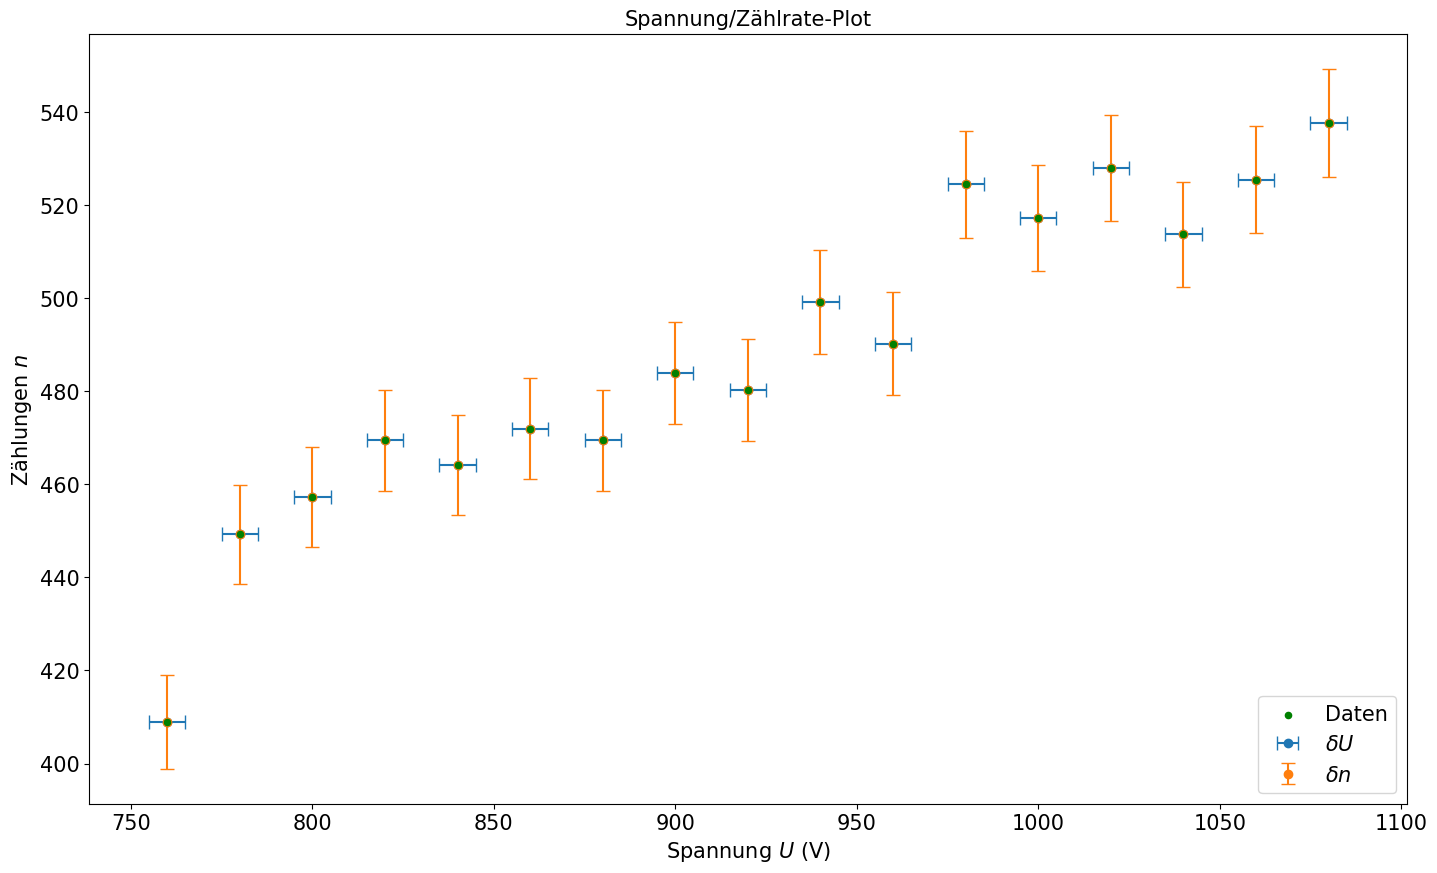

In [ ]:
#Aufgabe1
voltages = np.arange(760, 1100, 20)  # array of voltages to read in

mean_values = []  # array to store mean values and corresponding voltages

for voltage in voltages:
    filename = f'Aufgabe 1 {voltage}V.txt'
    mean_value = read_geiger_A1(filename)
    mean_values.append((voltage, mean_value))

plt.subplots(1,1,figsize=(17, 10));

x = [float(i[0]) for i in mean_values]
y = [float(i[1].nominal_value) for i in mean_values]

plt.scatter(x, y, label = 'Daten', color='green', s=20, zorder= 5)

x_error = [5] * len(x)
y_error = [float(i[1].std_dev) for i in mean_values]

plt.errorbar(x, y, xerr=x_error, fmt='o', capsize=5, label = r'$δU$')
plt.errorbar(x, y, yerr=y_error, fmt='o', capsize=5, label = r'$δn$')


# Add axis labels and a title
plt.xlabel(r'Spannung $U$ (V)', fontsize=15)
plt.ylabel(r'Zählungen $n$', fontsize=15)
plt.title('Spannung/Zählrate-Plot', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.legend(loc = 'lower right', fontsize=15)
plt.show()

8.4
2.4474476501040834
0.2771188766484012


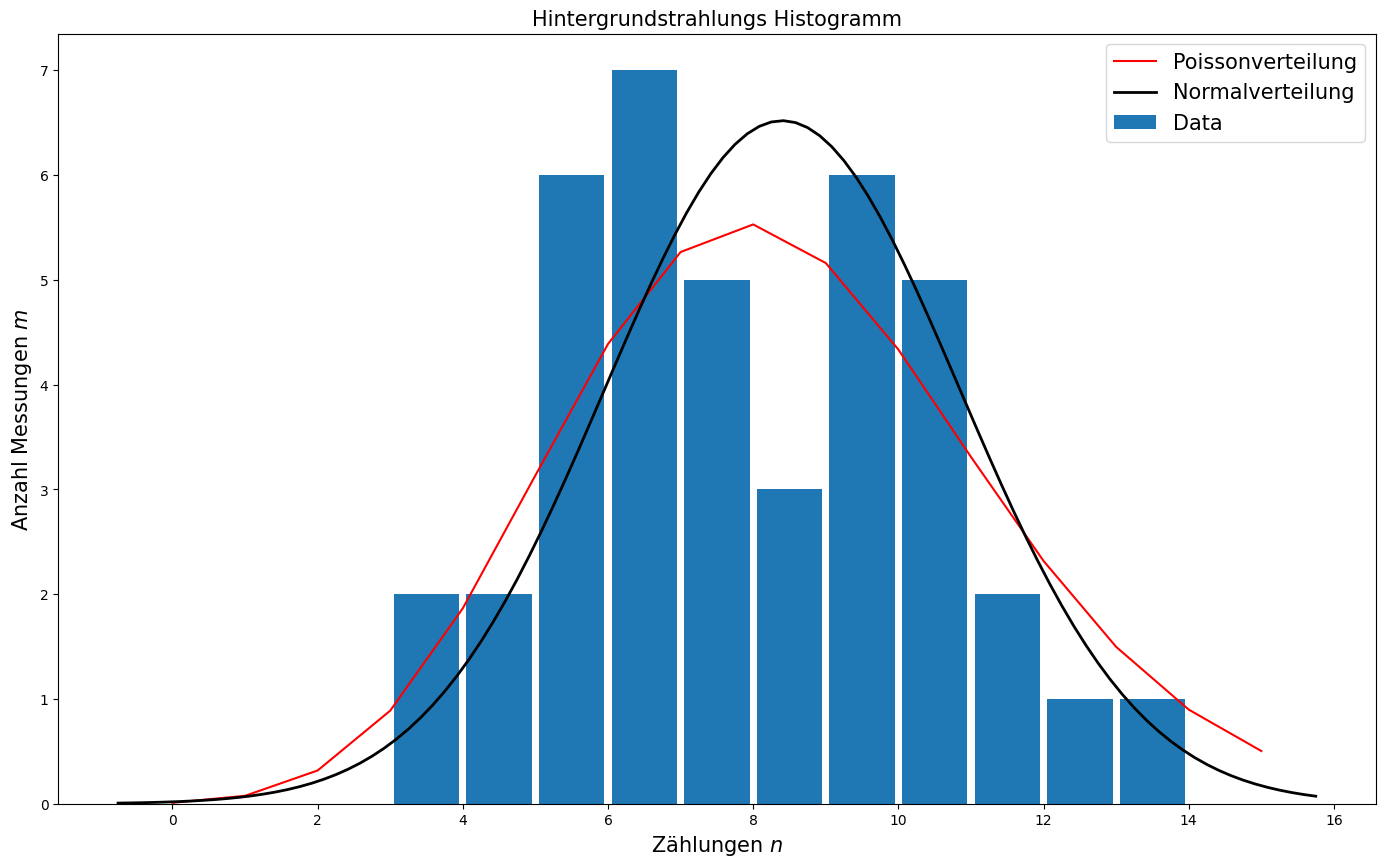

336+/-18


In [ ]:
#Aufgabe2
filename = 'Aufgabe 2 930V.txt'
A2_values = read_geiger_A2(filename)

Mittelwert = np.mean(A2_values)
Standardabweichung = np.std(A2_values)
print(Mittelwert)
print(Standardabweichung)
Fehler_Standardabweichung = Standardabweichung/(np.sqrt(2*(len(A2_values)-1)))
print(Fehler_Standardabweichung)

fig, ax = plt.subplots(1,1,figsize=(17, 10));

bins = np.arange(min(A2_values), max(A2_values) + 2) - 0.5
hist, edges = np.histogram(A2_values, bins=bins)
plt.bar(edges[:-1], hist, width=0.9, label='Data')

x_poisson = np.arange(0, 16, 1)
y_poisson = poisson.pmf(x_poisson, mu=Mittelwert)

# Plotten des Histogramms und der Poissonverteilung
plt.plot(x_poisson, y_poisson * sum(hist), color='red', ms=4, label='Poissonverteilung')

mu, std = norm.fit(A2_values)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = 40*norm.pdf(x, Mittelwert, Standardabweichung)
plt.plot(x, p, 'k', linewidth=2, label='Normalverteilung')

ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Anzahl Messungen $m$', fontsize=15)
plt.xlabel(r'Zählungen $n$', fontsize=15)
plt.title('Hintergrundstrahlungs Histogramm', fontsize=15)
plt.legend(loc = 'upper right', fontsize=15)
plt.show()

sum = sum(A2_values)
un = np.sqrt(sum)
sum = ufloat(sum, un)
print(sum)

-0.004368494+/-0.000000032
5.4339+/-0.0013


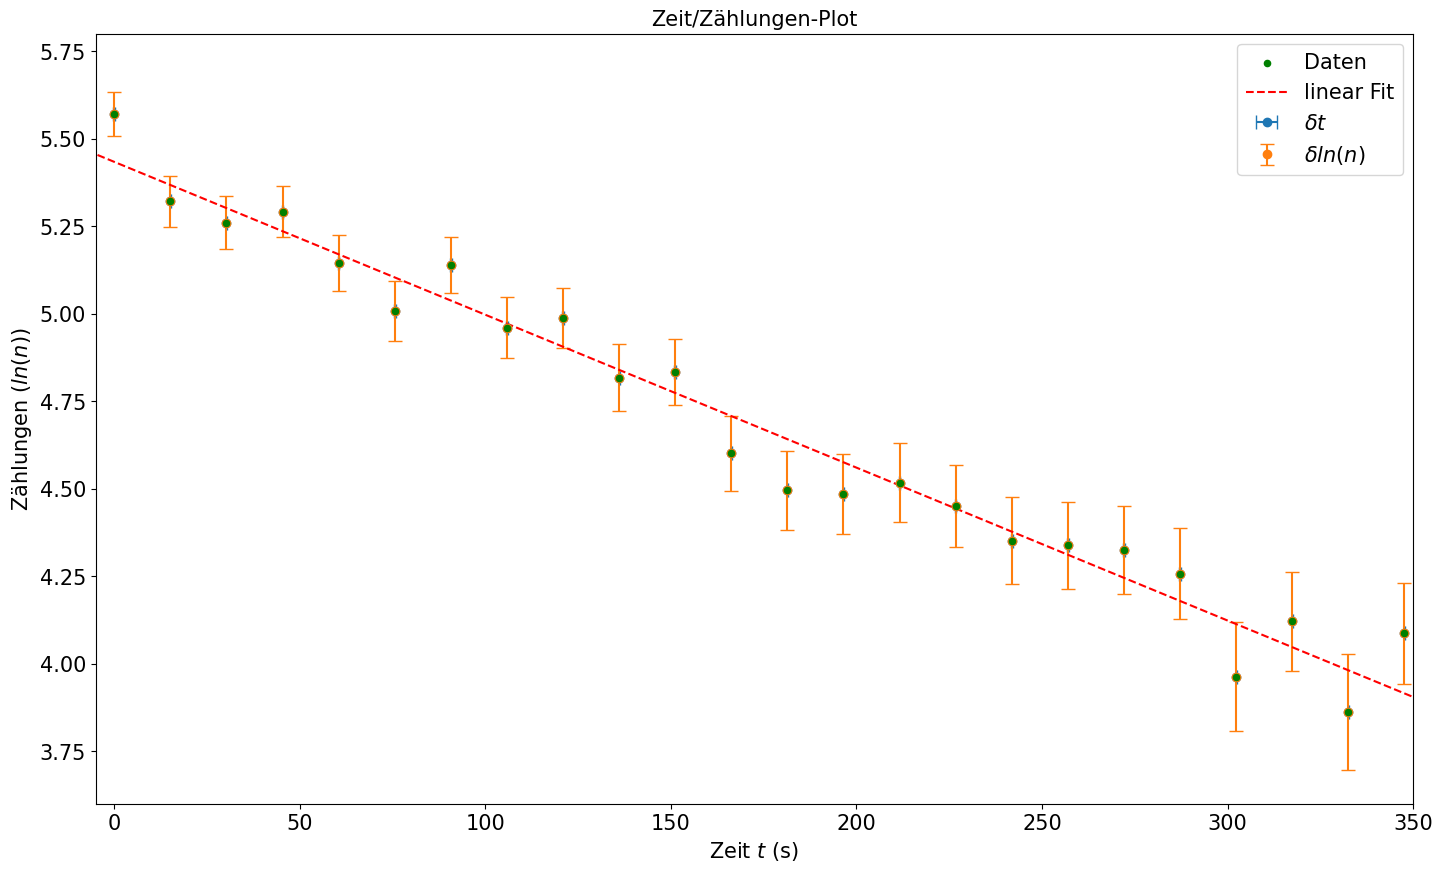

2.644493+/-0.000019


In [ ]:
#Aufgabe3

filename = 'Aufgabe 3 930V.txt'
[A3_zr, A3_t] = read_geiger_A3(filename)

correction = ufloat(Mittelwert, Standardabweichung)
A3_zr = A3_zr - correction
A3_zr = unp.log(A3_zr)
plt.subplots(1,1,figsize=(17, 10));

x = [float(i.nominal_value) for i in A3_t]
y = [float(i.nominal_value) for i in A3_zr]

plt.scatter(x, y, label = 'Daten', color='green', s=20, zorder= 5)

x_error = [float(i.std_dev) for i in A3_t]
y_error = [float(i.std_dev) for i in A3_zr]

plt.errorbar(x, y, xerr=x_error, fmt='o', capsize=5, label = r'$δt$')
plt.errorbar(x, y, yerr=y_error, fmt='o', capsize=5, label = r'$δln(n)$')

popt, pcov = sc.optimize.curve_fit(line, x, y)
a, b = popt
x_line = arange(-10, 400)
y_line = line(x_line, a, b)
perr = np.diag(pcov)
steigung = ufloat(popt[0], pcov[0][0])
Schnitt = ufloat(popt[1], pcov[1][1])

plt.plot(x_line, y_line, '--', color='red', label = 'linear Fit')
print(steigung)
print(Schnitt)


# Add axis labels and a title
plt.xlabel(r'Zeit $t$ (s)', fontsize=15)
plt.ylabel(r'Zählungen $(ln(n))$', fontsize=15)
plt.title('Zeit/Zählungen-Plot', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.legend(loc = 'upper right', fontsize=15)
plt.axis([0, 200, 3.6, 5.8]) #Achsenanpassung
plt.show()

Hwz = (-np.log(2))/(steigung*60)
print(Hwz)

[115.4+/-12.062614420873555 79.4+/-11.554508499571353
 62.4+/-11.306635220082056 59.06666666666667+/-11.257392632794188
 43.4+/-11.023006244517266 36.06666666666667+/-10.911563692808754]
[0.0+/-0 1.7+/-0.05 3.5+/-0.07071067811865477
 5.1000000000000005+/-0.08660254037844388 6.75+/-0.1
 8.35+/-0.1118033988749895]
-0.13150+/-0.00012
4.6718+/-0.0032


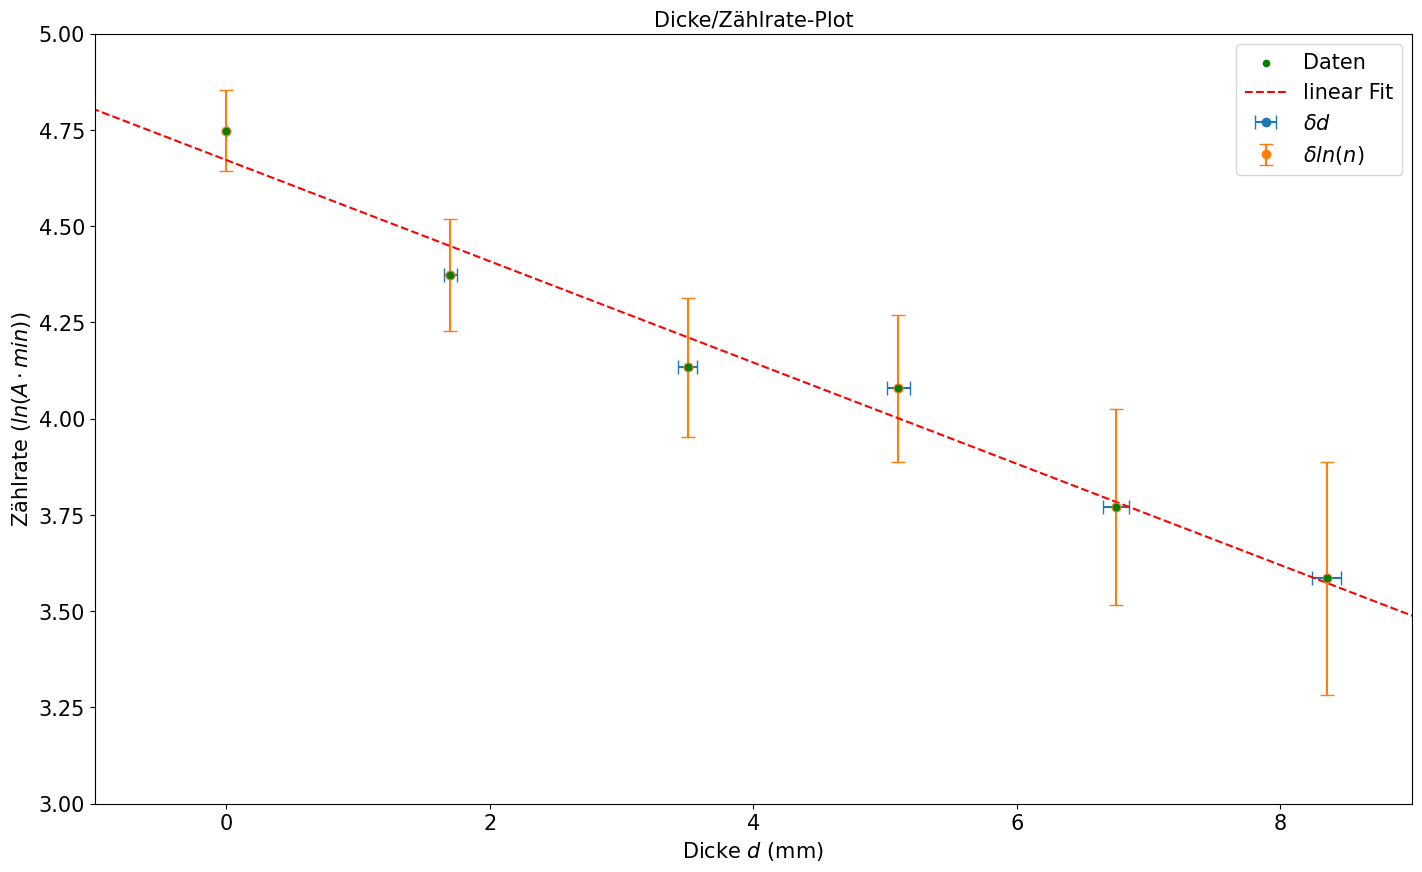

5.271+/-0.005


In [ ]:
#Aufgabe4

platte1 = np.array([122, 105, 112])
platte2 = np.array([97, 105, 86])
platte3 = np.array([82, 97, 99])
platte4 = np.array([78, 74, 79])
platte5 = np.array([71, 65, 73])
platte0 = np.array([124, 162, 161])

dp0 = ufloat(0, 0)
dp1 = ufloat(1.7, 0.05)
dp2 = ufloat(1.8, 0.05)
dp3 = ufloat(1.6, 0.05)
dp4 = ufloat(1.65, 0.05)
dp5 = ufloat(1.6, 0.05)

uncertainty_zahlrate_values = [math.sqrt(value) for value in platte0]
uplatte0 = unp.uarray(platte0, uncertainty_zahlrate_values)

uncertainty_zahlrate_values = [math.sqrt(value) for value in platte1]
uplatte1 = unp.uarray(platte1, uncertainty_zahlrate_values)

uncertainty_zahlrate_values = [math.sqrt(value) for value in platte2]
uplatte2 = unp.uarray(platte2, uncertainty_zahlrate_values)

uncertainty_zahlrate_values = [math.sqrt(value) for value in platte3]
uplatte3 = unp.uarray(platte3, uncertainty_zahlrate_values)

uncertainty_zahlrate_values = [math.sqrt(value) for value in platte4]
uplatte4 = unp.uarray(platte4, uncertainty_zahlrate_values)

uncertainty_zahlrate_values = [math.sqrt(value) for value in platte5]
uplatte5 = unp.uarray(platte5, uncertainty_zahlrate_values)

mean0 = np.mean(uplatte0)
mean1 = np.mean(uplatte1)
mean2 = np.mean(uplatte2)
mean3 = np.mean(uplatte3)
mean4 = np.mean(uplatte4)
mean5 = np.mean(uplatte5)

mean = np.array([mean0, mean1, mean2, mean3, mean4, mean5])
mean = mean - (4*correction)
print(mean)
mean = unp.log(mean)
dp = np.array([dp0, dp1, dp2+dp1, dp3+dp2+dp1, dp4+dp3+dp2+dp1, dp5+dp4+dp3+dp2+dp1])
print(dp)

plt.subplots(1,1,figsize=(17, 10));

x = [float(i.nominal_value) for i in dp]
y = [float(i.nominal_value) for i in mean]

plt.scatter(x, y, label = 'Daten', color='green', s=20, zorder= 5)

x_error = [float(i.std_dev) for i in dp]
y_error = [float(i.std_dev) for i in mean]

plt.errorbar(x, y, xerr=x_error, fmt='o', capsize=5, label = r'$δd$')
plt.errorbar(x, y, yerr=y_error, fmt='o', capsize=5, label = r'$δln(n)$')

popt, pcov = sc.optimize.curve_fit(line, x, y)
a, b = popt
x_line = arange(-5, 20)
y_line = line(x_line, a, b)
perr = np.diag(pcov)
steigung = ufloat(popt[0], pcov[0][0])
Schnitt = ufloat(popt[1], pcov[1][1])

plt.plot(x_line, y_line, '--', color='red', label = 'linear Fit')
print(steigung)
print(Schnitt)


# Add axis labels and a title
plt.xlabel(r'Dicke $d$ (mm)', fontsize=15)
plt.ylabel(r'Zählrate $(ln(A\cdot min))$', fontsize=15)
plt.title('Dicke/Zählrate-Plot', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.legend(loc = 'upper right', fontsize=15)
plt.axis([-1, 9, 3, 5]) #Achsenanpassung
plt.show()

Hwd = (-np.log(2))/(steigung)
print(Hwd)